<a href="https://colab.research.google.com/github/PianoMaker/PythonTask1/blob/main/%22Task1_Matrix_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Напишіть програму, яка:
#- генерує матрицю розміром 10х10, заповнений випадковими числами від 1.01 до 9.99
#- виводить на екран елементи головної діагоналі
#- виводить статистику (середнє значення, мінімальне та максимальне значення, медіану, дисперсію та стандартне відхилення)

import numpy as np
arr = np.random.uniform(low=1.01, high=9.99, size=(10, 10))
arr = np.round(arr, 2)
print("initial array:\n", arr)
d = np.diag(arr)
print("diagonal:\n", d)
mean = np.mean(arr)
max = np.max(arr)
min = np.min(arr)
median = np.median(arr)
dispersion = np.var(arr)
std = np.std(arr)
print("Stats:")
print("Mean      :", mean)
print("Max       :", max)
print("Min       :", min)
print("Median    :", median)
print("Variance  :", dispersion)
print("Std. deviation:", std)

initial array:
 [[9.14 2.52 1.36 2.9  9.07 7.27 2.79 5.48 3.19 8.9 ]
 [9.52 1.04 5.16 2.83 4.97 9.55 6.98 7.41 4.12 4.68]
 [7.45 4.77 4.33 4.6  8.2  6.68 4.97 9.61 5.83 6.29]
 [5.21 4.04 1.9  8.11 5.8  6.06 9.42 8.21 6.37 2.26]
 [4.26 5.38 7.86 9.71 7.52 6.19 1.06 7.79 5.45 3.33]
 [9.36 6.62 6.54 4.31 4.42 6.56 5.45 6.08 9.08 6.65]
 [7.73 6.15 5.17 4.14 1.81 6.99 8.8  6.03 4.78 6.59]
 [5.69 5.99 7.94 5.38 5.94 2.35 8.81 3.17 1.18 7.53]
 [4.73 7.94 9.45 6.07 3.37 3.47 9.29 1.97 9.81 3.58]
 [9.33 2.28 1.12 7.51 3.53 1.4  9.2  7.89 8.9  6.23]]
diagonal:
 [9.14 1.04 4.33 8.11 7.52 6.56 8.8  3.17 9.81 6.23]
Stats:
Mean      : 5.8185
Max       : 9.81
Min       : 1.04
Median    : 6.01
Variance  : 6.00611875
Std. deviation: 2.4507384091330513


✅ Файл знайдено.


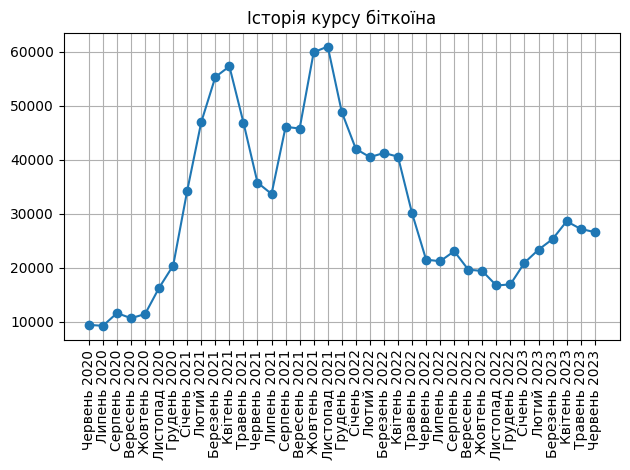

date: Січень 2021 , price: 34287.41
date: Лютий 2021 , price: 46972.32
date: Березень 2021 , price: 55298.89
date: Квітень 2021 , price: 57270.72
date: Травень 2021 , price: 46863.76
date: Червень 2021 , price: 35756.15
date: Липень 2021 , price: 33659.42
date: Серпень 2021 , price: 46075.59
date: Вересень 2021 , price: 45765.76
date: Жовтень 2021 , price: 59887.82
date: Листопад 2021 , price: 60940.55
date: Грудень 2021 , price: 48802.47
date: Січень 2022 , price: 41991.89
date: Лютий 2022 , price: 40476.14
date: Березень 2022 , price: 41240.52
date: Квітень 2022 , price: 40555.15
date: Травень 2022 , price: 30089.61


In [ ]:
# Напишіть програму, яка буде аналізувати історичні дані про курс біткоїну (у прикріпленому файлі), вибираючи з файлу дні, коли:
#- курс перевищував $ 30 000 в момент закриття біржи
#- об'єм торгів складав не менше $ 16 000 000 000  // цих даних немає у файлі!

import os
import numpy as np
import matplotlib.pyplot as plt
path = '/content/bitcoin.csv'


if not os.path.exists(path):
    print(f"❌ Файл не знайдено за шляхом: {path}")
    print("🔁 Завантажте файл або перевірте правильність шляху.")
else:
    print("✅ Файл знайдено.")

    data = np.genfromtxt(path, dtype=str, encoding='utf-8', delimiter=None)
    data = data[::-1] #файл чомусь подано в зворотгньому порядку.

    #print("🔎 Перші 5 рядків:")
    #print(data[:5])

    dates = []
    values = []

    for row in data:
        if len(row) >= 4:
             date = f"{row[0]} {row[1]}"
             number_str = row[2] + row[3]
             try:
                value = float(number_str.replace(',', '').replace(' ', ''))
                dates.append(date)
                values.append(value)
             except ValueError:
                print(f"Помилка перетворення числа: {number_str}")
        else:
            print(f"Рядок пропущено: {row}")

    # Побудова графіку
    plt.plot(dates, values, marker='o')
    plt.xticks(rotation=90)
    plt.title("Історія курсу біткоїна")
    plt.tight_layout()
    plt.grid()
    plt.show()

    values_array = np.array(values)
    values30indexes = np.argwhere(values_array > 30000).flatten()
    dates30 = [dates[i] for i in values30indexes]

    for i in values30indexes:
        print("date:", dates[i], ", price:", values_array[i])
